<a href="https://colab.research.google.com/github/bahmad6890/machine-learning/blob/master/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/HealtyNormalized.csv")
#df=pd.read_csv('HealtyNormalized.csv',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1999943, 2)


,vsH,vbH
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


In [6]:
newdf = df.rename(columns={"vsH": "speed", "vbH": "vibration"})
print('Shape of data',newdf.shape)
newdf.head()

Shape of data (1999943, 2)


,speed,vibration
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


In [7]:
# it change style and colour for graph 
#from yellowbrick.classifier import ClassificationReport
## OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)
plt.rcParams['agg.path.chunksize'] = 100000

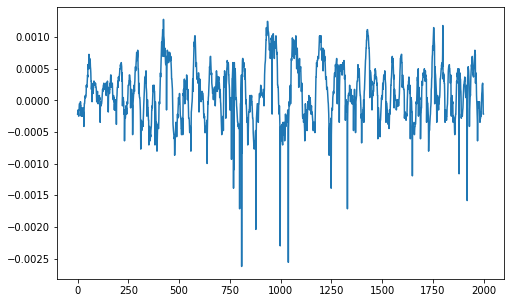

In [8]:
df = newdf.iloc[0:2000]
#df = newdf
df['vibration'].plot(figsize=(8,5))

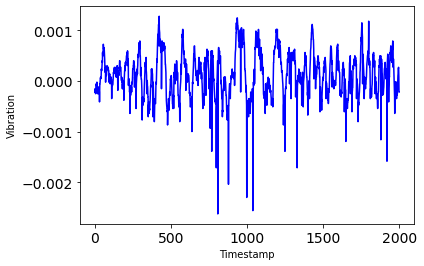

In [9]:
g = sns.lineplot(x="index", y="vibration",color='b',
                data=df.reset_index(), palette="tab10")

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Timestamp")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')
#plt.savefig("../")
#plt.savefig("E:/Projects/notebook/figures/healthyvibration.png", bbox_inches='tight', dpi=1200)

In [10]:
df.describe()

,speed,vibration
count,2000.000000,2000.000000
mean,0.000509,0.000129
std,0.000500,0.000428
min,-0.000001,-0.002624
25%,0.000009,-0.000152
50%,0.000434,0.000108
75%,0.001012,0.000400
max,0.001050,0.001278


## Step 2: Visualize the Data

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
test_result=adfuller(df['vibration'])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(vibration):
    result=adfuller(vibration)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(df['vibration'])

ADF Test Statistic : -7.353256424872217
p-value : 9.931669695175407e-11
#Lags Used : 22
Number of Observations Used : 1977
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

## Auto Regressive Model
![image.png](attachment:image.png)

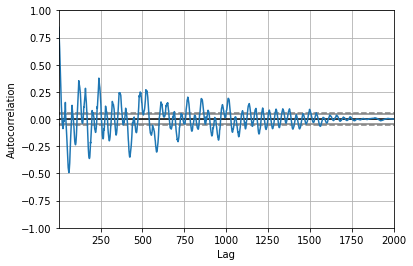

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['vibration'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

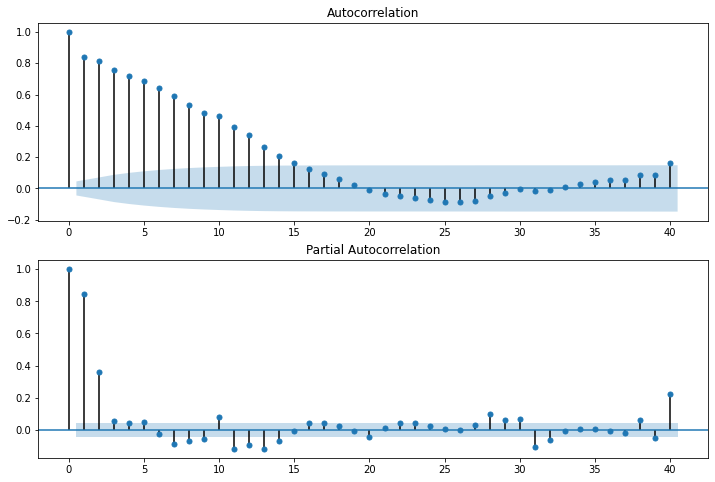

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['vibration'].iloc[100:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['vibration'].iloc[100:],lags=40,ax=ax2)

In [18]:
"""import time
from numpy import asarray
#time.sleep(2)
i = -1
results = []
pval = []
dval = []
qval = []

for p in range(5):
   # print("q: " + str(q))
    for d in range(4):
        #print("d: " + str(d))
        for q in range(2):
            i+=1
            print("i: " + str(i) + " , p: " + str(p) + " , d: " + str(d) + " , q: " + str(q))
            model=sm.tsa.statespace.SARIMAX(df['vibration'],order=(p,d, q),seasonal_order=(p,d,q,40))
            result = model.fit()
            results.append(result)
            pval.append(p)
            dval.append(d)
            qval.append(q)
            time.sleep(1)
            print(res.mle_retvals)
            
            #model=sm.tsa.statespace.SARIMAX(df['vibration'],order=(p,d, q),seasonal_order=(p,d,q,40))
            #results=model.fit()

            #df['forecast']=results.predict(start=450,end=499,dynamic=True)
            #df[['vibration','forecast']].plot(figsize=(12,8)) , results"""

'import time\nfrom numpy import asarray\n#time.sleep(2)\ni = -1\nresults = []\npval = []\ndval = []\nqval = []\n\nfor p in range(5):\n   # print("q: " + str(q))\n    for d in range(4):\n        #print("d: " + str(d))\n        for q in range(2):\n            i+=1\n            print("i: " + str(i) + " , p: " + str(p) + " , d: " + str(d) + " , q: " + str(q))\n            model=sm.tsa.statespace.SARIMAX(df[\'vibration\'],order=(p,d, q),seasonal_order=(p,d,q,40))\n            result = model.fit()\n            results.append(result)\n            pval.append(p)\n            dval.append(d)\n            qval.append(q)\n            time.sleep(1)\n            print(res.mle_retvals)\n            \n            #model=sm.tsa.statespace.SARIMAX(df[\'vibration\'],order=(p,d, q),seasonal_order=(p,d,q,40))\n            #results=model.fit()\n\n            #df[\'forecast\']=results.predict(start=450,end=499,dynamic=True)\n            #df[[\'vibration\',\'forecast\']].plot(figsize=(12,8)) , results'

In [19]:
"""x = len(results)
plen = len(pval)
dlen = len(dval)
qlen = len(qval)

j = -1
for p in range(plen):
    
    print("q: " + str(p) + " , p: " + str(pval[p])+ " , d: " + str(dval[p])+ " , q: " + str(qval[p]) + " , results: " + str(results[p]))
    time.sleep(1)"""

'x = len(results)\nplen = len(pval)\ndlen = len(dval)\nqlen = len(qval)\n\nj = -1\nfor p in range(plen):\n    \n    print("q: " + str(p) + " , p: " + str(pval[p])+ " , d: " + str(dval[p])+ " , q: " + str(qval[p]) + " , results: " + str(results[p]))\n    time.sleep(1)'

In [20]:
"""x = len(results)
j = -1
for q in range(x):
   
    print("q: " + str(q) + " , p: " + str(pval[q])+ " , d: " + str(dval[q])+ " , q: " + str(qval[q])+ " , results: " + str(results[q]))

    df['forecast']=results[q].predict(start=500,end=599,dynamic=True)
    # plot baseline and predictions
    plt.figure(figsize=(16, 4))
    #plt.plot(scaler.inverse_transform(dataset),label='Training data')
    plt.plot(df['vibration'], label='Dataset')
    plt.plot(df['forecast'], label='forecast')

    plt.figtext(.8, .8, "p = " + str(pval[q]) )
    plt.figtext( .8, .7,"d = " + str(dval[q]) )
    plt.figtext(.8, .6,"q = " + str(qval[q]) )

    plt.legend();
    plt.show()
    time.sleep(1)

#df['forecast']=results[23].predict(start=450,end=499,dynamic=True)
#df[['vibration','forecast']].plot(figsize=(12,8)) 
"""

'x = len(results)\nj = -1\nfor q in range(x):\n   \n    print("q: " + str(q) + " , p: " + str(pval[q])+ " , d: " + str(dval[q])+ " , q: " + str(qval[q])+ " , results: " + str(results[q]))\n\n    df[\'forecast\']=results[q].predict(start=500,end=599,dynamic=True)\n    # plot baseline and predictions\n    plt.figure(figsize=(16, 4))\n    #plt.plot(scaler.inverse_transform(dataset),label=\'Training data\')\n    plt.plot(df[\'vibration\'], label=\'Dataset\')\n    plt.plot(df[\'forecast\'], label=\'forecast\')\n\n    plt.figtext(.8, .8, "p = " + str(pval[q]) )\n    plt.figtext( .8, .7,"d = " + str(dval[q]) )\n    plt.figtext(.8, .6,"q = " + str(qval[q]) )\n\n    plt.legend();\n    plt.show()\n    time.sleep(1)\n\n#df[\'forecast\']=results[23].predict(start=450,end=499,dynamic=True)\n#df[[\'vibration\',\'forecast\']].plot(figsize=(12,8)) \n'

### I don't know the best way to estimate seasonal_order(sp,sd,sq,s) parameters.
parameter s:

    1 for yearly
    4 for quarterly
    12 for monthly
    52 for weekly
    365 for daily


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'fopt': -6.287696145919381, 'gopt': array([ 8.55689066e-01,  8.33915351e-01,  7.74597158e-01,  7.39332596e-01,
       -8.55670001e-01, -8.33897425e-01,  2.03857185e-01,  6.60135761e-02,
        1.46212792e-02, -2.33660239e-02, -1.80779342e-01, -5.54536570e-02,
        4.58336814e+01]), 'fcalls': 784, 'warnflag': 2, 'converged': False, 'iterations': 4}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


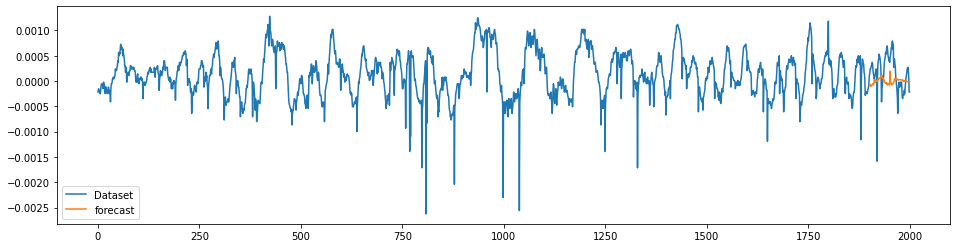

In [25]:
p = 4
d = 0
q = 1
model=sm.tsa.statespace.SARIMAX(df['vibration'],order=(p,d,q),seasonal_order=(p,d,q,12))
res = model.fit()
print(res.mle_retvals)

df['forecast']=res.predict(start=1900,end=1999,dynamic=True)
# plot baseline and predictions
plt.figure(figsize=(16, 4))
#plt.plot(scaler.inverse_transform(dataset),label='Training data')
plt.plot(df['vibration'], label='Dataset')
plt.plot(df['forecast'], label='forecast')

"""plt.figtext(.8, .8, "p = " + str(pval[q]) )
plt.figtext( .8, .7,"d = " + str(dval[q]) )
plt.figtext(.8, .6,"q = " + str(qval[q]) )"""

plt.legend();
plt.show()
